In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [38]:
driver = webdriver.Chrome('../driver/chromedriver')
driver.get("https://nid.naver.com/nidlogin.login")

In [5]:
driver.save_screenshot('../images/002.png')

True

In [35]:
# 정상 로그인 방법 => 자동로그인 때문에 막힘

elem_login = driver.find_element_by_id("id")
elem_login.clear()
elem_login.send_keys('lkkjasd')
elem_login = driver.find_element_by_id("pw")
elem_login.clear()
elem_login.send_keys("******") #자신의 비번을 넣으세요

In [39]:
# 우회해서 로그인 하는 방법 ( 자동 로그인 방지 )
id = '아이디'
pw = '비밀번호'

driver.execute_script("document.getElementsByName('id')[0].value=\'" + 'lkkjasd' + "\'")
driver.execute_script("document.getElementsByName('pw')[0].value=\'" + '******' + "\'")

xpath = """//*[@id="frmNIDLogin"]/fieldset/input"""
driver.find_element_by_xpath(xpath).click()

In [40]:
driver.get("http://mail.naver.com")

In [41]:
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [42]:
raw_list = soup.find_all('div', 'name _ccr(lst.from)')
raw_list

[<div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|37701) _stopDefault" href="#" title='"쿠팡" &lt;noreply@e.coupang.com&gt;'>쿠팡</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|37699) _stopDefault" href="#" title='"GitLab" &lt;gitlab@lab.ssafy.com&gt;'>GitLab</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|37698) _stopDefault" href="#" title='"티몬 무한타임" &lt;noreply@tmon.kr&gt;'>티몬 무한타임</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|37697) _stopDefault" href="#" title='"Facebook" &lt;notification@facebookmail.com&gt;'>Facebook</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|37696) _sto

In [43]:
send_list = [raw_list[n].find('a').get_text() for n in range(0, len(raw_list))]
send_list

['쿠팡',
 'GitLab',
 '티몬 무한타임',
 'Facebook',
 'The VIA Institute',
 'The VIA Institute',
 '알라딘[인문/사회]',
 '티몬 타임어택',
 '이벤트메일',
 '티몬 무료배송데이',
 'Rebeca from Justinm..',
 '네이버 웹툰',
 '네이버 웹툰',
 '씨네통',
 '티몬 심야타임']

In [44]:
driver.close()

In [64]:
driver = webdriver.Chrome('../driver/chromedriver')
driver.get("https://www.opinet.co.kr/searRgSelect.do")
driver.get("https://www.opinet.co.kr/searRgSelect.do")

In [61]:
# xpath = """//*[@id="gnb"]/ul/li[1]/a"""
# driver.find_element_by_xpath(xpath).click()
# xpath = """//*[@id="gnb_0_0"]"""
# driver.find_element_by_xpath(xpath).click()

# //*[@id="gnb_sub_0"]/a
# //*[@id="gnb_0_0"]

In [69]:
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name("option")

In [70]:
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['가평군',
 '고양시',
 '고양시덕양구',
 '고양시일산동구',
 '고양시일산서구',
 '과천시',
 '광명시',
 '광주시',
 '구리시',
 '군포시',
 '김포시',
 '남양주시',
 '동두천시',
 '부천시',
 '성남시',
 '성남시분당구',
 '성남시수정구',
 '성남시중원구',
 '수원시',
 '수원시권선구',
 '수원시영통구',
 '수원시장안구',
 '수원시팔달구',
 '시흥시',
 '안산시',
 '안산시단원구',
 '안산시상록구',
 '안성시',
 '안양시',
 '안양시동안구',
 '안양시만안구',
 '양주시',
 '양평군',
 '여주시',
 '연천군',
 '오산시',
 '용인시',
 '용인시기흥구',
 '용인시수지구',
 '용인시처인구',
 '의왕시',
 '의정부시',
 '이천시',
 '파주시',
 '평택시',
 '포천시',
 '하남시',
 '화성시']

In [77]:
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[19])

In [78]:
xpath = """//*[@id="searRgSelect"]"""
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [79]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath = """//*[@id="searRgSelect"]"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    xpath = """//*[@id="glopopd_excel"]"""
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)

In [80]:
driver.close()

In [81]:
import pandas as pd
from glob import glob

In [89]:
glob('../data/지역*.xls')

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (25).xls',
 '../data\\지역_위치별(주유소) (26).xls',
 '../data\\지역_위치별(주유소) (27).xls',
 '../data\\지역_위치별(주유소) (28).xls',
 '../data\\지역_위치별(주유소) (29).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (30).xls',
 '../data\\지역_위치별(주유소) (31).xls',
 '../data\\지역_위치별(주유소) (32).xls',
 '../data\\지역_위치별(주유소) (33).xls',
 '../data\\지역_위치별(주유소) (34).xls',
 '../data\\지역_위치별(주유소) (35).xls',
 '../data\\지역_위치별

In [91]:
stations_files = glob('../data/지역*.xls')
stations_files

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (25).xls',
 '../data\\지역_위치별(주유소) (26).xls',
 '../data\\지역_위치별(주유소) (27).xls',
 '../data\\지역_위치별(주유소) (28).xls',
 '../data\\지역_위치별(주유소) (29).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (30).xls',
 '../data\\지역_위치별(주유소) (31).xls',
 '../data\\지역_위치별(주유소) (32).xls',
 '../data\\지역_위치별(주유소) (33).xls',
 '../data\\지역_위치별(주유소) (34).xls',
 '../data\\지역_위치별(주유소) (35).xls',
 '../data\\지역_위치별

In [92]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [93]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2463 entries, 0 to 41
Data columns (total 10 columns):
지역       2463 non-null object
상호       2463 non-null object
주소       2463 non-null object
상표       2463 non-null object
전화번호     2463 non-null object
셀프여부     2463 non-null object
고급휘발유    2463 non-null object
휘발유      2463 non-null object
경유       2463 non-null object
실내등유     2463 non-null object
dtypes: object(10)
memory usage: 211.7+ KB


In [94]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,경기도,"J＆S(주)원흥,원당동지점",경기 고양시 덕양구 호국로 1113 (원당동),현대오일뱅크,031-909-5189,Y,-,1465,1315,950
1,경기도,개나리주유소,경기도 고양시 덕양구 보광로 126 (벽제동),알뜰주유소,031-962-5545,Y,-,1465,1307,-
2,경기도,덕양주유소,경기 고양시 덕양구 충장로 142 (행신동),알뜰주유소,031-979-8426,Y,-,1473,1335,-
3,경기도,(주)어울림주유소,경기도 고양시 덕양구 충장로 407 (화정동 188-20),알뜰주유소,031-967-5145,Y,-,1475,1325,-
4,경기도,너멍골알뜰주유소,경기 고양시 덕양구 호국로 1259,알뜰주유소,02-371-2264,Y,-,1475,1325,950


In [95]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'], 
                                       '주소':station_raw['주소'],
                                       '가격':station_raw['휘발유'],
                                       '셀프':station_raw['셀프여부'],
                                       '상표':station_raw['상표']  })
stations.head()

,Oil_store,주소,가격,셀프,상표
0,"J＆S(주)원흥,원당동지점",경기 고양시 덕양구 호국로 1113 (원당동),1465,Y,현대오일뱅크
1,개나리주유소,경기도 고양시 덕양구 보광로 126 (벽제동),1465,Y,알뜰주유소
2,덕양주유소,경기 고양시 덕양구 충장로 142 (행신동),1473,Y,알뜰주유소
3,(주)어울림주유소,경기도 고양시 덕양구 충장로 407 (화정동 188-20),1475,Y,알뜰주유소
4,너멍골알뜰주유소,경기 고양시 덕양구 호국로 1259,1475,Y,알뜰주유소


In [96]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,"J＆S(주)원흥,원당동지점",경기 고양시 덕양구 호국로 1113 (원당동),1465,Y,현대오일뱅크,고양시
1,개나리주유소,경기도 고양시 덕양구 보광로 126 (벽제동),1465,Y,알뜰주유소,고양시
2,덕양주유소,경기 고양시 덕양구 충장로 142 (행신동),1473,Y,알뜰주유소,고양시
3,(주)어울림주유소,경기도 고양시 덕양구 충장로 407 (화정동 188-20),1475,Y,알뜰주유소,고양시
4,너멍골알뜰주유소,경기 고양시 덕양구 호국로 1259,1475,Y,알뜰주유소,고양시


In [98]:
stations['구'].unique()

array(['고양시', '고양시일산서구', '김포시', '부천시', '성남시', '수원시', '수원시영통구', '시흥시',
       '안산시', '안성시', '안양시', '동안구', '양주시', '양평군', '여주시', '여주군', '연천군',
       '오산시', '용인시', '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시',
       '화성시', '송산면', '과천시', '광명시', '광주시', '광주', '구리시', '군포시', '가평군'],
      dtype=object)

In [99]:
stations = stations[stations['가격'] != '-']
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,"J＆S(주)원흥,원당동지점",경기 고양시 덕양구 호국로 1113 (원당동),1465,Y,현대오일뱅크,고양시
1,개나리주유소,경기도 고양시 덕양구 보광로 126 (벽제동),1465,Y,알뜰주유소,고양시
2,덕양주유소,경기 고양시 덕양구 충장로 142 (행신동),1473,Y,알뜰주유소,고양시
3,(주)어울림주유소,경기도 고양시 덕양구 충장로 407 (화정동 188-20),1475,Y,알뜰주유소,고양시
4,너멍골알뜰주유소,경기 고양시 덕양구 호국로 1259,1475,Y,알뜰주유소,고양시


In [100]:
stations['가격'] = [float(value) for value in stations['가격']]

In [101]:
stations.reset_index(inplace=True)
del stations['index']

In [102]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397 entries, 0 to 2396
Data columns (total 6 columns):
Oil_store    2397 non-null object
주소           2397 non-null object
가격           2397 non-null float64
셀프           2397 non-null object
상표           2397 non-null object
구            2397 non-null object
dtypes: float64(1), object(5)
memory usage: 112.4+ KB


In [103]:
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,"J＆S(주)원흥,원당동지점",경기 고양시 덕양구 호국로 1113 (원당동),1465.0,Y,현대오일뱅크,고양시
1,개나리주유소,경기도 고양시 덕양구 보광로 126 (벽제동),1465.0,Y,알뜰주유소,고양시
2,덕양주유소,경기 고양시 덕양구 충장로 142 (행신동),1473.0,Y,알뜰주유소,고양시
3,(주)어울림주유소,경기도 고양시 덕양구 충장로 407 (화정동 188-20),1475.0,Y,알뜰주유소,고양시
4,너멍골알뜰주유소,경기 고양시 덕양구 호국로 1259,1475.0,Y,알뜰주유소,고양시


In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

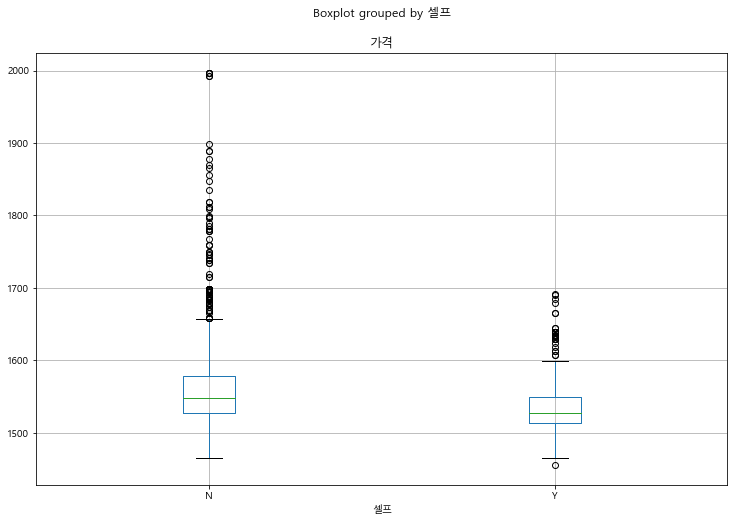

In [105]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8));

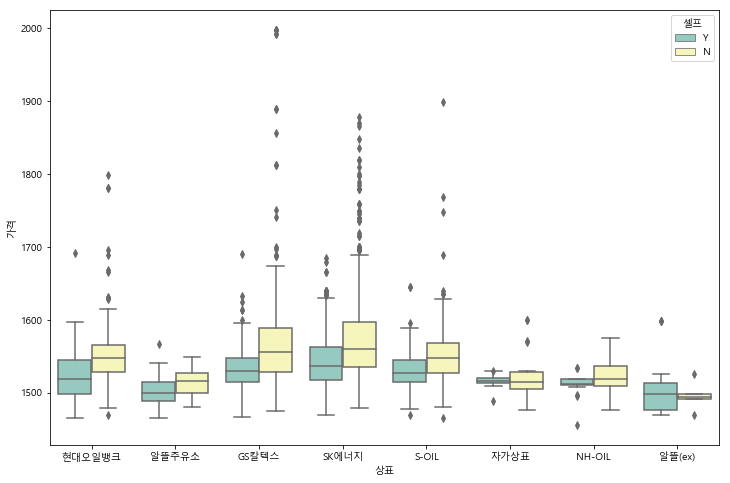

In [106]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.show()

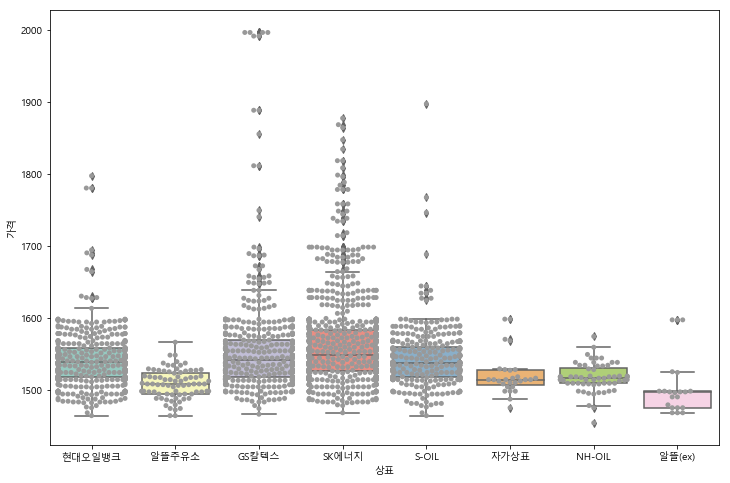

In [107]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", data=stations, palette="Set3")
sns.swarmplot(x="상표", y="가격", data=stations, color=".6")
plt.show()

In [108]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [109]:
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
343,주유소티파니블루,"경기 성남시 분당구 판교로 35, (운중동)",1997.0,N,GS칼텍스,성남시
344,분당로마도시고속주유소,경기 성남시 분당구 수내로 2 (수내동),1997.0,N,GS칼텍스,성남시
369,주유소티파니블루,"경기 성남시 분당구 판교로 35, (운중동)",1997.0,N,GS칼텍스,성남시
368,분당로마도시고속주유소,경기 성남시 분당구 수내로 2 (수내동),1997.0,N,GS칼텍스,성남시
367,(주)소모에너지엔테크놀러지 백궁주유소,경기 성남시 분당구 성남대로407번길 13 (정자동),1992.0,N,GS칼텍스,성남시
342,(주)소모에너지엔테크놀러지 백궁주유소,경기 성남시 분당구 성남대로407번길 13 (정자동),1992.0,N,GS칼텍스,성남시
1965,서하남나들목주유소,경기 하남시 서하남로 29 (감북동),1898.0,N,S-OIL,하남시
366,(주)소모에너지엔테크놀러지 동화주유소,경기 성남시 분당구 돌마로 176 (정자동),1889.0,N,GS칼텍스,성남시
341,(주)소모에너지엔테크놀러지 동화주유소,경기 성남시 분당구 돌마로 176 (정자동),1889.0,N,GS칼텍스,성남시
142,사우디제 7 주유소,경기 고양시 일산동구 백마로 37 (장항동),1878.0,N,SK에너지,고양시


In [110]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
901,장흥농협주유소(구매),경기도 양주시 장흥면 호국로 183,1455.0,Y,NH-OIL,양주시
0,"J＆S(주)원흥,원당동지점",경기 고양시 덕양구 호국로 1113 (원당동),1465.0,Y,현대오일뱅크,고양시
1,개나리주유소,경기도 고양시 덕양구 보광로 126 (벽제동),1465.0,Y,알뜰주유소,고양시
902,(주)유공,경기 양주시 백석읍 월암로 208,1465.0,N,S-OIL,양주시
903,(주)교현 알뜰주유소,경기 양주시 장흥면 북한산로 863,1465.0,Y,알뜰주유소,양주시
512,엠에이치에너지 월곶동,경기 시흥시 서해안로 804-1,1467.0,Y,GS칼텍스,시흥시
513,상천네트워크㈜ 시흥풀페이주유소,경기 시흥시 서해안로 1317 (방산동),1469.0,Y,S-OIL,시흥시
1967,대보유통㈜화성(하)목포방향,경기 화성시 팔탄면 서해안고속도로 301-1,1469.0,N,알뜰(ex),화성시
1966,대보유통(주)화성(상)주유소/충전소,경기도 화성시 팔탄면 서해안고속도로 302-1,1469.0,Y,알뜰(ex),화성시
514,승원주유소,경기도 시흥시 서해안로 1081 (방산동),1469.0,Y,SK에너지,시흥시


In [111]:
import numpy as np

gu_data = pd.pivot_table(stations, index=["구"], values=["가격"], 
                         aggfunc=np.mean)
gu_data.head()

,가격
구,
가평군,1563.975000
고양시,1520.853801
고양시일산서구,1494.000000
과천시,1569.500000
광명시,1550.060606


In [114]:
geo_path = '../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.1728, 127.032], zoom_start=10.5, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = gu_data,
               columns=[gu_data.index, '가격'],
               fill_color='PuRd', #PuRd, YlGnBu
               key_on='feature.id')
map

In [115]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
343,주유소티파니블루,"경기 성남시 분당구 판교로 35, (운중동)",1997.0,N,GS칼텍스,성남시
344,분당로마도시고속주유소,경기 성남시 분당구 수내로 2 (수내동),1997.0,N,GS칼텍스,성남시
369,주유소티파니블루,"경기 성남시 분당구 판교로 35, (운중동)",1997.0,N,GS칼텍스,성남시
368,분당로마도시고속주유소,경기 성남시 분당구 수내로 2 (수내동),1997.0,N,GS칼텍스,성남시
367,(주)소모에너지엔테크놀러지 백궁주유소,경기 성남시 분당구 성남대로407번길 13 (정자동),1992.0,N,GS칼텍스,성남시
342,(주)소모에너지엔테크놀러지 백궁주유소,경기 성남시 분당구 성남대로407번길 13 (정자동),1992.0,N,GS칼텍스,성남시
1965,서하남나들목주유소,경기 하남시 서하남로 29 (감북동),1898.0,N,S-OIL,하남시
366,(주)소모에너지엔테크놀러지 동화주유소,경기 성남시 분당구 돌마로 176 (정자동),1889.0,N,GS칼텍스,성남시
341,(주)소모에너지엔테크놀러지 동화주유소,경기 성남시 분당구 돌마로 176 (정자동),1889.0,N,GS칼텍스,성남시
142,사우디제 7 주유소,경기 고양시 일산동구 백마로 37 (장항동),1878.0,N,SK에너지,고양시


In [116]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
901,장흥농협주유소(구매),경기도 양주시 장흥면 호국로 183,1455.0,Y,NH-OIL,양주시
0,"J＆S(주)원흥,원당동지점",경기 고양시 덕양구 호국로 1113 (원당동),1465.0,Y,현대오일뱅크,고양시
1,개나리주유소,경기도 고양시 덕양구 보광로 126 (벽제동),1465.0,Y,알뜰주유소,고양시
902,(주)유공,경기 양주시 백석읍 월암로 208,1465.0,N,S-OIL,양주시
903,(주)교현 알뜰주유소,경기 양주시 장흥면 북한산로 863,1465.0,Y,알뜰주유소,양주시
512,엠에이치에너지 월곶동,경기 시흥시 서해안로 804-1,1467.0,Y,GS칼텍스,시흥시
513,상천네트워크㈜ 시흥풀페이주유소,경기 시흥시 서해안로 1317 (방산동),1469.0,Y,S-OIL,시흥시
1967,대보유통㈜화성(하)목포방향,경기 화성시 팔탄면 서해안고속도로 301-1,1469.0,N,알뜰(ex),화성시
1966,대보유통(주)화성(상)주유소/충전소,경기도 화성시 팔탄면 서해안고속도로 302-1,1469.0,Y,알뜰(ex),화성시
514,승원주유소,경기도 시흥시 서해안로 1081 (방산동),1469.0,Y,SK에너지,시흥시


In [117]:
gmap_key = "**************" # 2장에서 구한 자신의 key를 입력
gmaps = googlemaps.Client(key=gmap_key)

In [118]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
        
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
343,주유소티파니블루,"경기 성남시 분당구 판교로 35, (운중동)",1997.0,N,GS칼텍스,성남시,37.390331,127.084864
344,분당로마도시고속주유소,경기 성남시 분당구 수내로 2 (수내동),1997.0,N,GS칼텍스,성남시,37.383360,127.114098
369,주유소티파니블루,"경기 성남시 분당구 판교로 35, (운중동)",1997.0,N,GS칼텍스,성남시,37.390331,127.084864
368,분당로마도시고속주유소,경기 성남시 분당구 수내로 2 (수내동),1997.0,N,GS칼텍스,성남시,37.383360,127.114098
367,(주)소모에너지엔테크놀러지 백궁주유소,경기 성남시 분당구 성남대로407번길 13 (정자동),1992.0,N,GS칼텍스,성남시,37.372179,127.106266
342,(주)소모에너지엔테크놀러지 백궁주유소,경기 성남시 분당구 성남대로407번길 13 (정자동),1992.0,N,GS칼텍스,성남시,37.372179,127.106266
1965,서하남나들목주유소,경기 하남시 서하남로 29 (감북동),1898.0,N,S-OIL,하남시,37.516933,127.147554
366,(주)소모에너지엔테크놀러지 동화주유소,경기 성남시 분당구 돌마로 176 (정자동),1889.0,N,GS칼텍스,성남시,37.354582,127.118907
341,(주)소모에너지엔테크놀러지 동화주유소,경기 성남시 분당구 돌마로 176 (정자동),1889.0,N,GS칼텍스,성남시,37.354582,127.118907
142,사우디제 7 주유소,경기 고양시 일산동구 백마로 37 (장항동),1878.0,N,SK에너지,고양시,37.643271,126.760209


In [119]:
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = oil_price_bottom10['주소'][n].split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0]['geometry']
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
    
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
901,장흥농협주유소(구매),경기도 양주시 장흥면 호국로 183,1455.0,Y,NH-OIL,양주시,37.717070,126.941465
0,"J＆S(주)원흥,원당동지점",경기 고양시 덕양구 호국로 1113 (원당동),1465.0,Y,현대오일뱅크,고양시,38.000094,127.025300
1,개나리주유소,경기도 고양시 덕양구 보광로 126 (벽제동),1465.0,Y,알뜰주유소,고양시,37.726215,126.907979
902,(주)유공,경기 양주시 백석읍 월암로 208,1465.0,N,S-OIL,양주시,37.812203,126.957696
903,(주)교현 알뜰주유소,경기 양주시 장흥면 북한산로 863,1465.0,Y,알뜰주유소,양주시,37.698792,126.969393
512,엠에이치에너지 월곶동,경기 시흥시 서해안로 804-1,1467.0,Y,GS칼텍스,시흥시,37.409265,126.755509
513,상천네트워크㈜ 시흥풀페이주유소,경기 시흥시 서해안로 1317 (방산동),1469.0,Y,S-OIL,시흥시,37.409265,126.755509
1967,대보유통㈜화성(하)목포방향,경기 화성시 팔탄면 서해안고속도로 301-1,1469.0,N,알뜰(ex),화성시,37.143612,126.879074
1966,대보유통(주)화성(상)주유소/충전소,경기도 화성시 팔탄면 서해안고속도로 302-1,1469.0,Y,알뜰(ex),화성시,37.143612,126.879074
514,승원주유소,경기도 시흥시 서해안로 1081 (방산동),1469.0,Y,SK에너지,시흥시,37.210111,126.803200


In [123]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=9.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]], 
                                  radius=15, color='#CD3181', 
                                  fill_color='#CD3181',
                                  fill=True).add_to(map)
    
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]): 
        folium.CircleMarker([oil_price_bottom10['lat'][n], 
                                  oil_price_bottom10['lng'][n]], 
                                  radius=15, color='#3186cc', 
                                  fill_color='#3186cc',
                                  fill=True).add_to(map)
        
map